In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from tqdm import tqdm
from fuzzywuzzy import fuzz

In [8]:
df=pd.read_csv('C:\\Users\\nitin\\Downloads\\spotify_dataset\\dataset.csv')
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.track_genre.value_counts()

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

In [12]:
df.artists.value_counts()

The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64

In [13]:
df[df['artists']=='arijit'].value_counts()

Series([], dtype: int64)

In [14]:
df=df.loc[df.loc[:, 'popularity']>= 60, :]
df.shape

(14822, 20)

In [15]:
df.corr()

C:\Users\nitin\AppData\Local\Temp/ipykernel_3428/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.015455,0.111240,0.137311,0.094560,0.003123,0.157670,-0.017944,0.010469,-0.133530,-0.154008,-0.044945,0.080306,-0.011071,0.023653
duration_ms,-0.015455,1.000000,-0.083349,-0.219762,0.079049,0.002998,0.049064,0.005979,-0.134096,-0.082711,-0.009704,-0.017014,-0.113676,0.013054,-0.023027
explicit,0.111240,-0.083349,1.000000,0.151384,0.070779,0.001029,0.099152,-0.044322,0.283316,-0.107215,-0.088261,0.037397,0.010439,0.029601,0.051985
danceability,0.137311,-0.219762,0.151384,1.000000,0.131036,0.043125,0.287567,-0.112923,0.175343,-0.157287,-0.242267,-0.051536,0.443735,-0.136830,0.199525
energy,0.094560,0.079049,0.070779,0.131036,1.000000,0.041875,0.767202,-0.115239,0.129336,-0.730298,-0.305642,0.176174,0.343877,0.191830,0.182667
key,0.003123,0.002998,0.001029,0.043125,0.041875,1.000000,0.030198,-0.121663,0.032785,-0.039254,-0.005779,-0.003779,0.034479,0.008043,0.008270
loudness,0.157670,0.049064,0.099152,0.287567,0.767202,0.030198,1.000000,-0.098826,0.100782,-0.606550,-0.544165,0.118404,0.283277,0.166477,0.187790
mode,-0.017944,0.005979,-0.044322,-0.112923,-0.115239,-0.121663,-0.098826,1.000000,-0.082092,0.115275,0.018488,-0.039458,-0.021482,-0.001904,-0.032796
speechiness,0.010469,-0.134096,0.283316,0.175343,0.129336,0.032785,0.100782,-0.082092,1.000000,-0.081403,-0.086764,0.087661,0.108678,0.100769,0.059191
acousticness,-0.133530,-0.082711,-0.107215,-0.157287,-0.730298,-0.039254,-0.606550,0.115275,-0.081403,1.000000,0.251509,-0.119990,-0.209112,-0.149274,-0.170173


C:\Users\nitin\AppData\Local\Temp/ipykernel_3428/663599987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


<AxesSubplot:>

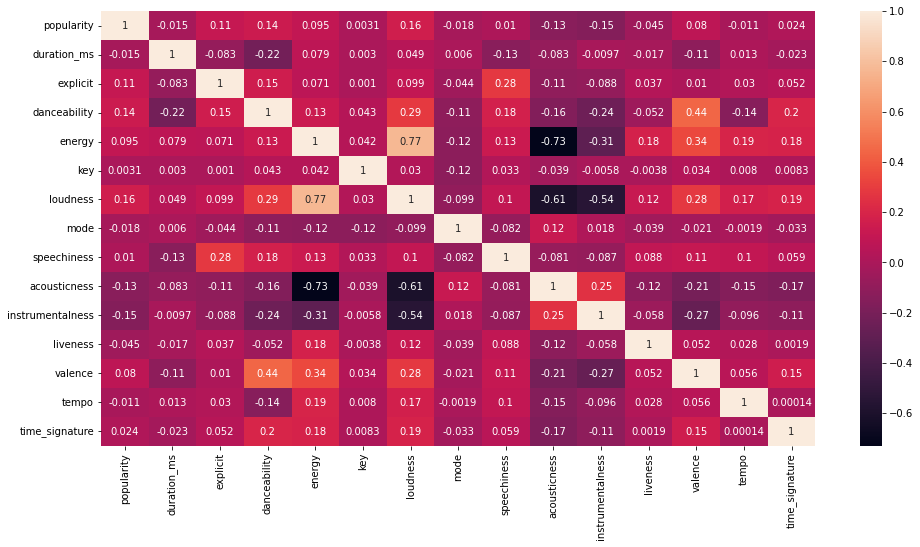

In [16]:
plt.figure(figsize = (16,8))
sn.heatmap(df.corr(), annot=True)

In [17]:
df['name']=df[['artists','track_name']].apply(lambda x: ', '.join(x), axis=1)
df['name']

0                                       Gen Hoshino, Comedy
3                  Kina Grannis, Can't Help Falling In Love
4                                 Chord Overstreet, Hold On
6         A Great Big World;Christina Aguilera, Say Some...
7                                     Jason Mraz, I'm Yours
                                ...                        
113130                   for KING & COUNTRY, Burn The Ships
113136             Cory Asbury, The Father's House - Studio
113140    All Sons & Daughters;Leslie Jordan;David Leona...
113170                           Mosaic MSC, Tremble - Live
113238             Mosaic MSC, This Is How I Thank The Lord
Name: name, Length: 14822, dtype: object

In [18]:
df['popularity'].max() 

100

In [19]:
temp=df.drop(['artists','track_name','track_id','track_genre','name','album_name','time_signature','key','mode'], axis=1)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14822 entries, 0 to 113238
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        14822 non-null  int64  
 1   duration_ms       14822 non-null  int64  
 2   explicit          14822 non-null  bool   
 3   danceability      14822 non-null  float64
 4   energy            14822 non-null  float64
 5   loudness          14822 non-null  float64
 6   speechiness       14822 non-null  float64
 7   acousticness      14822 non-null  float64
 8   instrumentalness  14822 non-null  float64
 9   liveness          14822 non-null  float64
 10  valence           14822 non-null  float64
 11  tempo             14822 non-null  float64
dtypes: bool(1), float64(9), int64(2)
memory usage: 1.4 MB


In [20]:
num_clust = 30

wcss = []

for i in tqdm(range(2, num_clust+1)):
    print(f'k={i}')
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(temp)
    wcss.append(kmeans.inertia_)


  3%|██▊                                                                                | 1/29 [00:00<00:05,  4.70it/s]

k=2
k=3


  7%|█████▋                                                                             | 2/29 [00:00<00:07,  3.81it/s]

k=4


 10%|████████▌                                                                          | 3/29 [00:00<00:08,  3.12it/s]

k=5


 14%|███████████▍                                                                       | 4/29 [00:01<00:09,  2.66it/s]

k=6


 17%|██████████████▎                                                                    | 5/29 [00:01<00:09,  2.41it/s]

k=7


 21%|█████████████████▏                                                                 | 6/29 [00:02<00:12,  1.90it/s]

k=8


 24%|████████████████████                                                               | 7/29 [00:03<00:12,  1.79it/s]

k=9


 28%|██████████████████████▉                                                            | 8/29 [00:04<00:13,  1.52it/s]

k=10


 31%|█████████████████████████▊                                                         | 9/29 [00:04<00:13,  1.43it/s]

k=11


 34%|████████████████████████████▎                                                     | 10/29 [00:05<00:14,  1.30it/s]

k=12


 38%|███████████████████████████████                                                   | 11/29 [00:06<00:13,  1.38it/s]

k=13


 41%|█████████████████████████████████▉                                                | 12/29 [00:07<00:11,  1.45it/s]

k=14


 45%|████████████████████████████████████▊                                             | 13/29 [00:07<00:11,  1.40it/s]

k=15


 48%|███████████████████████████████████████▌                                          | 14/29 [00:08<00:11,  1.31it/s]

k=16


 52%|██████████████████████████████████████████▍                                       | 15/29 [00:09<00:10,  1.37it/s]

k=17


 55%|█████████████████████████████████████████████▏                                    | 16/29 [00:10<00:09,  1.35it/s]

k=18


 59%|████████████████████████████████████████████████                                  | 17/29 [00:10<00:08,  1.37it/s]

k=19


 62%|██████████████████████████████████████████████████▉                               | 18/29 [00:11<00:08,  1.28it/s]

k=20


 66%|█████████████████████████████████████████████████████▋                            | 19/29 [00:12<00:08,  1.23it/s]

k=21


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:13<00:07,  1.14it/s]

k=22


 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:14<00:07,  1.13it/s]

k=23


 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:15<00:06,  1.12it/s]

k=24


 79%|█████████████████████████████████████████████████████████████████                 | 23/29 [00:16<00:05,  1.12it/s]

k=25


 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [00:17<00:04,  1.12it/s]

k=26


 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:18<00:03,  1.12it/s]

k=27


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:19<00:02,  1.11it/s]

k=28


 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:20<00:01,  1.05it/s]

k=29


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:21<00:00,  1.04it/s]

k=30


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:22<00:00,  1.32it/s]


c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


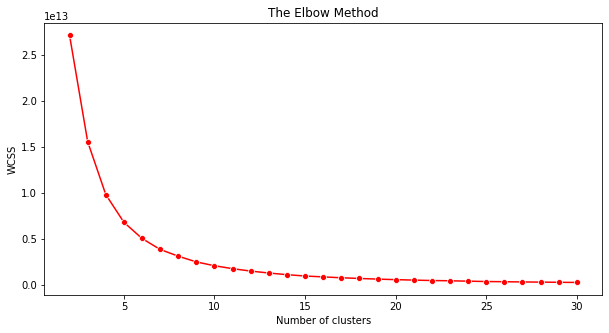

In [21]:
plt.figure(figsize=(10,5))
sn.lineplot(range(2, num_clust+1), wcss,marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
num_clust = 15

kmeans = KMeans(n_clusters = num_clust)
y_kmeans = kmeans.fit_predict(temp)

df.loc[:, 'cluster'] = y_kmeans

In [23]:
# df.to_csv("clustered_df.csv", index=False)

In [24]:
song_name=input("Enter song name: ")

Enter song name: tum se hi


In [27]:
flag=False
for i, row in df.iterrows():
    if(fuzz.token_set_ratio(song_name, row['name'])>90):
        song_name=row['track_name']
        song_cluster=row['cluster']
        song_genre=row['track_genre']
        song_artist=row['artists']
        flag=True
        break

In [28]:
flag

True

In [29]:
song_name

'Tum Se Hi'

In [30]:
song_genre

'indian'

In [31]:
song_artist

'Pritam;Mohit Chauhan'

In [32]:
cluster_df = df[df['cluster']==song_cluster]
cluster_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,name,cluster
149,0fzCtVM9D5UEwiLqcY8Ouq,Eddie Vedder,Into The Wild (Music For The Motion Picture),Hard Sun,65,322080,False,0.438,0.827,8,...,0.0328,0.051200,0.000402,0.3190,0.645,143.377,4,acoustic,"Eddie Vedder, Hard Sun",9
2052,4m0q0xQ2BNl9SCAGKyfiGZ,The 1975,"I like it when you sleep, for you are so beaut...",Somebody Else,73,347525,True,0.618,0.793,0,...,0.0601,0.204000,0.015400,0.1260,0.459,101.015,4,alt-rock,"The 1975, Somebody Else",9
2105,48UPSzbZjgc449aqz8bxox,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,329733,False,0.592,0.767,9,...,0.0270,0.002100,0.001650,0.1270,0.328,96.483,4,alt-rock,"Red Hot Chili Peppers, Californication",9
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,...,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock,"Red Hot Chili Peppers, Snow (Hey Oh)",9
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,...,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock,"Red Hot Chili Peppers, Snow (Hey Oh)",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111085,0xjkgYSzHjBZNvyUaC9cXX,Morcheeba,Big Calm,The Sea,62,347280,False,0.535,0.761,11,...,0.0373,0.016500,0.114000,0.0485,0.248,149.968,4,trip-hop,"Morcheeba, The Sea",9
113001,0fxpHpK3aw2nFWII6yveDD,Matt Redman,"10,000 Reasons (Live)","10,000 Reasons (Bless The Lord) - Live",66,342493,False,0.431,0.485,7,...,0.0274,0.452000,0.000000,0.5440,0.367,145.220,4,world-music,"Matt Redman, 10,000 Reasons (Bless The Lord) -...",9
113002,0rH0mprtecH3grD9HFM5AD,Cory Asbury,Reckless Love,Reckless Love,70,333386,False,0.572,0.685,6,...,0.0356,0.029100,0.000000,0.0963,0.232,110.698,4,world-music,"Cory Asbury, Reckless Love",9
113028,524KQvc46Y1X6HRomMKoBJ,Hillsong Worship,Ultimate Worship Vol 1,Still,61,320506,False,0.419,0.473,0,...,0.0282,0.340000,0.000000,0.1110,0.184,70.022,4,world-music,"Hillsong Worship, Still",9


In [33]:
cluster_df[cluster_df['track_genre']==song_genre]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,name,cluster
55007,7eQl3Yqv35ioqUfveKHitE,Pritam;Mohit Chauhan,Jab We Met,Tum Se Hi,74,321225,False,0.609,0.538,6,...,0.0273,0.328,0.000000,0.1250,0.608,130.015,4,indian,"Pritam;Mohit Chauhan, Tum Se Hi",9
55021,3Kl8p2PxVf8eAayLwTxOIm,Pritam;KK,Tum Mile (Original Motion Picture Soundtrack),Dil Ibaadat,69,329386,False,0.590,0.859,2,...,0.0416,0.633,0.000000,0.2860,0.634,149.966,4,indian,"Pritam;KK, Dil Ibaadat",9
55055,4blqlsA1uf2d2I40E90EUC,Pritam;Arijit Singh;Shilpa Rao,"Tere Hawaale (From ""Laal Singh Chaddha"")","Tere Hawaale (From ""Laal Singh Chaddha"")",67,346290,False,0.589,0.522,9,...,0.0391,0.642,0.000027,0.0992,0.310,109.094,4,indian,"Pritam;Arijit Singh;Shilpa Rao, Tere Hawaale (...",9
55065,1EjxJHY9A6LMOlvyZdwDly,Pritam;Neeraj Shridhar,Tum Mile (Original Motion Picture Soundtrack),Tum Mile,66,343786,False,0.738,0.798,0,...,0.0334,0.320,0.000005,0.3100,0.793,123.010,4,indian,"Pritam;Neeraj Shridhar, Tum Mile",9
55066,4vgCpNUUcpEIBifidhQOnR,Pritam;KK,Jannat (Original Motion Picture Soundtrack),Haan Tu Hain,64,324880,False,0.415,0.904,2,...,0.1040,0.718,0.000000,0.0739,0.729,83.648,4,indian,"Pritam;KK, Haan Tu Hain",9
55067,2vR23BjIzpLMtzsyKrM6Mb,Kailash Kher;Paresh Kamath;Naresh Kamath,Kailasa Jhoomo Re,Saiyyan,70,343906,False,0.473,0.562,0,...,0.0451,0.650,0.000117,0.1200,0.316,74.653,3,indian,"Kailash Kher;Paresh Kamath;Naresh Kamath, Saiyyan",9
55100,6ocOeSjnWPcSTaSsi0zIdY,Pritam;Shaan;Sultan Khan,Jab We Met,Aao Milo Chalo,62,325933,False,0.504,0.787,7,...,0.0605,0.412,0.000000,0.3230,0.490,114.772,4,indian,"Pritam;Shaan;Sultan Khan, Aao Milo Chalo",9
55103,5WncH5iZ5GFlnXm7jKEXVP,Pritam;KK,Bhool Bhulaiyaa,Labon Ko,63,341027,False,0.630,0.837,9,...,0.0387,0.329,0.002710,0.1590,0.473,107.997,4,indian,"Pritam;KK, Labon Ko",9
55108,1juJ3mwsFerctbngtK42G4,Pritam;Arijit Singh,Phantom,Saware,60,321613,False,0.499,0.683,6,...,0.0334,0.703,0.001610,0.0749,0.295,134.950,4,indian,"Pritam;Arijit Singh, Saware",9
55109,2iNqdCchlUZEgjJbQyZf8T,Kailash Kher;Paresh Kamath;Naresh Kamath,Kailasa,Teri Deewani,63,323520,False,0.447,0.600,4,...,0.0332,0.324,0.000000,0.0962,0.434,80.044,3,indian,"Kailash Kher;Paresh Kamath;Naresh Kamath, Teri...",9


In [45]:
cluster_df['score']=0

C:\Users\nitin\AppData\Local\Temp/ipykernel_3428/1037136117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['score']=0


In [46]:
cluster_df.loc[cluster_df['track_genre']==song_genre, 'score'] += 1

In [47]:
cluster_df['score'].value_counts()

0    496
1     16
Name: score, dtype: int64

In [48]:
for artist in song_artist.split(';'):
    cluster_df.loc[cluster_df['artists'].apply(lambda x: any(artist==s for s in x.split(';'))), 'score'] += 1

In [49]:
cluster_df['score'].value_counts()

0    490
2     12
1      9
3      1
Name: score, dtype: int64

In [50]:
cluster_df=cluster_df.sort_values(by=['score','popularity'], ascending=[False,False])
cluster_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,name,cluster,score
55007,7eQl3Yqv35ioqUfveKHitE,Pritam;Mohit Chauhan,Jab We Met,Tum Se Hi,74,321225,False,0.609,0.538,6,...,0.32800,0.000000,0.1250,0.608,130.015,4,indian,"Pritam;Mohit Chauhan, Tum Se Hi",9,3
55021,3Kl8p2PxVf8eAayLwTxOIm,Pritam;KK,Tum Mile (Original Motion Picture Soundtrack),Dil Ibaadat,69,329386,False,0.590,0.859,2,...,0.63300,0.000000,0.2860,0.634,149.966,4,indian,"Pritam;KK, Dil Ibaadat",9,2
55055,4blqlsA1uf2d2I40E90EUC,Pritam;Arijit Singh;Shilpa Rao,"Tere Hawaale (From ""Laal Singh Chaddha"")","Tere Hawaale (From ""Laal Singh Chaddha"")",67,346290,False,0.589,0.522,9,...,0.64200,0.000027,0.0992,0.310,109.094,4,indian,"Pritam;Arijit Singh;Shilpa Rao, Tere Hawaale (...",9,2
55065,1EjxJHY9A6LMOlvyZdwDly,Pritam;Neeraj Shridhar,Tum Mile (Original Motion Picture Soundtrack),Tum Mile,66,343786,False,0.738,0.798,0,...,0.32000,0.000005,0.3100,0.793,123.010,4,indian,"Pritam;Neeraj Shridhar, Tum Mile",9,2
55066,4vgCpNUUcpEIBifidhQOnR,Pritam;KK,Jannat (Original Motion Picture Soundtrack),Haan Tu Hain,64,324880,False,0.415,0.904,2,...,0.71800,0.000000,0.0739,0.729,83.648,4,indian,"Pritam;KK, Haan Tu Hain",9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83401,5IpIl6c14WCJhjlIl6poVD,Kaskade,On Your Mind,On Your Mind,60,320280,False,0.835,0.828,4,...,0.00235,0.743000,0.0602,0.178,107.995,4,progressive-house,"Kaskade, On Your Mind",9,0
84303,5CGpPUcUahMuLzkNK9ZgPP,Traffic,Mr. Fantasy,Dear Mr. Fantasy,60,334000,False,0.240,0.615,2,...,0.17100,0.012500,0.0801,0.768,166.657,4,psych-rock,"Traffic, Dear Mr. Fantasy",9,0
107677,5uRsBdLhn91AYcsTCOGNOC,Corey Hart,First Offense,Sunglasses At Night,60,320000,False,0.665,0.624,10,...,0.50500,0.010400,0.5180,0.717,127.083,4,synth-pop,"Corey Hart, Sunglasses At Night",9,0
109203,77cHi3HzlrS8XDgue2WT8y,Worakls,Utopia / Porto,Porto,60,330000,False,0.678,0.713,8,...,0.00136,0.865000,0.0837,0.190,127.993,4,techno,"Worakls, Porto",9,0


In [51]:
rec_df=cluster_df[['track_name','artists','name','album_name','track_genre']]
rec_df[:10]

,track_name,artists,name,album_name,track_genre
55007,Tum Se Hi,Pritam;Mohit Chauhan,"Pritam;Mohit Chauhan, Tum Se Hi",Jab We Met,indian
55021,Dil Ibaadat,Pritam;KK,"Pritam;KK, Dil Ibaadat",Tum Mile (Original Motion Picture Soundtrack),indian
55055,"Tere Hawaale (From ""Laal Singh Chaddha"")",Pritam;Arijit Singh;Shilpa Rao,"Pritam;Arijit Singh;Shilpa Rao, Tere Hawaale (...","Tere Hawaale (From ""Laal Singh Chaddha"")",indian
55065,Tum Mile,Pritam;Neeraj Shridhar,"Pritam;Neeraj Shridhar, Tum Mile",Tum Mile (Original Motion Picture Soundtrack),indian
55066,Haan Tu Hain,Pritam;KK,"Pritam;KK, Haan Tu Hain",Jannat (Original Motion Picture Soundtrack),indian
55103,Labon Ko,Pritam;KK,"Pritam;KK, Labon Ko",Bhool Bhulaiyaa,indian
55100,Aao Milo Chalo,Pritam;Shaan;Sultan Khan,"Pritam;Shaan;Sultan Khan, Aao Milo Chalo",Jab We Met,indian
55117,Bulleya,Pritam;Amit Mishra;Shilpa Rao,"Pritam;Amit Mishra;Shilpa Rao, Bulleya",Ae Dil Hai Mushkil (Original Motion Picture So...,indian
55120,Teri Ore,Pritam;Rahat Fateh Ali Khan;Shreya Ghoshal,"Pritam;Rahat Fateh Ali Khan;Shreya Ghoshal, Te...",Singh Is Kinng,indian
55113,Bhool Bhulaiyaa,Pritam;Neeraj Shridhar,"Pritam;Neeraj Shridhar, Bhool Bhulaiyaa",Bhool Bhulaiyaa,indian
